In [28]:
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
import numpy as np
#from imgaug import augmenters as iaa
#import cv2
from keras.layers.normalization import BatchNormalization
#import seaborn as sns
import pandas as pd 
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf
from keras.models import Model

In [29]:
path = 'C:/Users/Havoc/Downloads/dataset/'


# define paths
train_air_trapping_dir = path + 'Train/Air_trapping/'
train_aortic_elongation_dir = path + 'Train/Aortic_elongation/'
train_calcified_granuloma_dir = path + 'Train/Air_trapping/'
train_calcified_granuloma_dir = path + 'Train/Calcified_granuloma/'
train_callus_rib_fracture_dir = path + 'Train/Callus_rib_fracture/'
train_hiatal_hernia_dir = path + 'Train/Hiatal_hernia/'
train_laminar_atelectasis_fracture_dir = path + 'Train/Laminar_atelectasis/'
train_pleural_effusion_dir = path + 'Train/Pleural_effusion/'

test_air_trapping_dir = path + 'Test/Air_trapping/'
test_aortic_elongation_dir = path + 'Test/Aortic_elongation/'
test_calcified_granuloma_dir = path + 'Test/Calcified_granuloma/'
test_callus_rib_fracture_dir = path + 'Test/Callus_rib_fracture/'
test_hiatal_hernia_dir = path + 'Test/Hiatal_hernia/'
test_laminar_atelectasis_fracture_dir = path + 'Test/Laminar_atelectasis/'
test_pleural_effusion_dir = path + 'Test/Pleural_effusion/'

val_air_trapping_dir = path + 'val/Air_trapping/'
val_aortic_elongation_dir = path + 'val/Aortic_elongation/'
val_calcified_granuloma_dir = path + 'val/Calcified_granuloma/'
val_callus_rib_fracture_dir = path + 'val/Callus_rib_fracture/'
val_hiatal_hernia_dir = path + 'val/Hiatal_hernia/'
val_laminar_atelectasis_fracture_dir = path + 'val/Laminar_atelectasis/'
val_pleural_effusion_dir = path + 'val/Pleural_effusion/'


# find all files, our files has extension jpeg
#train_normal_cases = glob.glob(train_normal_dir + '*png')
train_air_trapping_cases = glob.glob(train_air_trapping_dir + '*png')
train_aortic_elongation_cases = glob.glob(train_aortic_elongation_dir + '*png')
train_calcified_granuloma_cases = glob.glob(train_calcified_granuloma_dir + '*png')
train_callus_rib_fracture_cases = glob.glob(train_callus_rib_fracture_dir + '*png')
train_hiatal_hernia_cases = glob.glob(train_hiatal_hernia_dir + '*png')
train_laminar_atelectasis_fracture_cases = glob.glob(train_laminar_atelectasis_fracture_dir + '*png')
train_pleural_effusion_cases = glob.glob(train_pleural_effusion_dir + '*png')

test_air_trapping_cases = glob.glob(test_air_trapping_dir + '*png')
test_aortic_elongation_cases = glob.glob(test_aortic_elongation_dir + '*png')
test_calcified_granuloma_cases = glob.glob(test_calcified_granuloma_dir + '*png')
test_callus_rib_fracture_cases = glob.glob(test_callus_rib_fracture_dir + '*png')
test_hiatal_hernia_cases = glob.glob(test_hiatal_hernia_dir + '*png')
test_laminar_atelectasis_fracture_cases = glob.glob(test_laminar_atelectasis_fracture_dir + '*png')
test_pleural_effusion_cases = glob.glob(test_pleural_effusion_dir + '*png')

val_air_trapping_cases = glob.glob(val_air_trapping_dir + '*png')
val_aortic_elongation_cases = glob.glob(val_aortic_elongation_dir + '*png')
val_calcified_granuloma_cases = glob.glob(val_calcified_granuloma_dir + '*png')
val_callus_rib_fracture_cases = glob.glob(val_callus_rib_fracture_dir + '*png')
val_hiatal_hernia_cases = glob.glob(val_hiatal_hernia_dir + '*png')
val_laminar_atelectasis_fracture_cases = glob.glob(val_laminar_atelectasis_fracture_dir + '*png')
val_pleural_effusion_cases = glob.glob(val_pleural_effusion_dir + '*png')


# make path using / instead of \\ ... this may be redudant step
'''
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]

test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]

'''

# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_air_trapping_cases:
    train_list.append([x, 0])
    
for x in train_aortic_elongation_cases:
    train_list.append([x, 1])

for x in train_calcified_granuloma_cases:
    train_list.append([x, 2])
    
for x in train_callus_rib_fracture_cases:
    train_list.append([x, 3])

for x in train_hiatal_hernia_cases:
    train_list.append([x,4])
    
for x in train_laminar_atelectasis_fracture_cases:
    train_list.append([x,5])
    
for x in train_pleural_effusion_cases:
    train_list.append([x,6])

for x in test_air_trapping_cases:
    test_list.append([x, 0])
    
for x in test_aortic_elongation_cases:
    test_list.append([x, 1])    

for x in test_calcified_granuloma_cases:
    test_list.append([x, 2])
    
for x in test_callus_rib_fracture_cases:
    test_list.append([x, 3])

for x in test_hiatal_hernia_cases:
    test_list.append([x,4])
    
for x in test_laminar_atelectasis_fracture_cases:
    test_list.append([x,5])
    
for x in test_pleural_effusion_cases:
    test_list.append([x,6])
    
for x in val_air_trapping_cases:
    val_list.append([x, 0])
    
for x in val_aortic_elongation_cases:
    val_list.append([x, 1])
    
for x in val_calcified_granuloma_cases:
    val_list.append([x, 2])
    
for x in val_callus_rib_fracture_cases:
    val_list.append([x, 3])

for x in val_hiatal_hernia_cases:
    val_list.append([x,4])
    
for x in val_laminar_atelectasis_fracture_cases:
    val_list.append([x,5])
    
for x in val_pleural_effusion_cases:
    val_list.append([x,6])


# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
rn.shuffle(train_list)
rn.shuffle(test_list)
rn.shuffle(val_list)


# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])

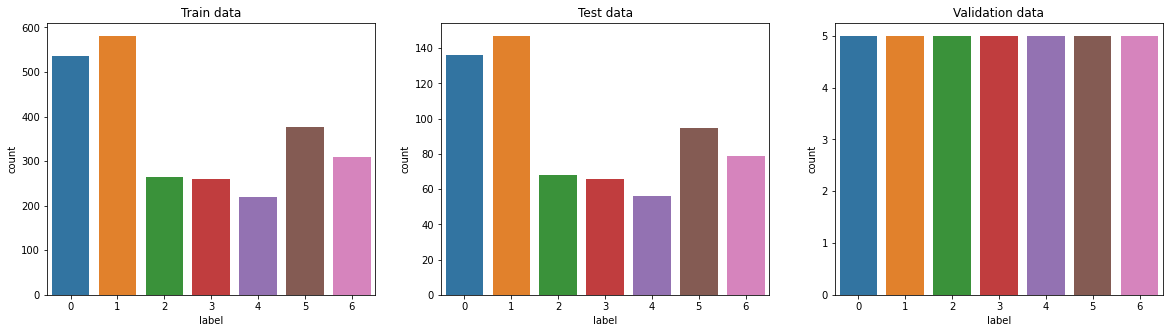

In [30]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(train_df['label'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['label'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['label'])
plt.title('Validation data')

plt.show()

In [31]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (196, 196))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (196,196,1))
    
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
        
    return np.array(data), np.array(labels)

In [32]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (2548, 196, 196, 1), Labels shape: (2548,)
Test data shape: (647, 196, 196, 1), Labels shape: (647,)
Validation data shape: (35, 196, 196, 1), Labels shape: (35,)


In [33]:
# define generator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)



# fit generator on our train features
datagen.fit(X_train)

In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [35]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.optimizers import Adam, RMSprop

In [36]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(196, 196, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', patience=20) 
history = model.fit(datagen.flow(X_train,y_train, batch_size=8), validation_data=(X_test, y_test), epochs = 600, verbose = 1)
#, class_weight={0:6.0, 1:0.5}

Epoch 1/600
319/319 [==============================] - 5s 15ms/step - loss: 1.8932 - accuracy: 0.2308 - val_loss: 1.8665 - val_accuracy: 0.2890
Epoch 2/600
319/319 [==============================] - 5s 14ms/step - loss: 1.8397 - accuracy: 0.2991 - val_loss: 1.7611 - val_accuracy: 0.3431
Epoch 3/600
319/319 [==============================] - 5s 14ms/step - loss: 1.7662 - accuracy: 0.3348 - val_loss: 1.6976 - val_accuracy: 0.3679
Epoch 4/600
319/319 [==============================] - 5s 14ms/step - loss: 1.7254 - accuracy: 0.3548 - val_loss: 1.6903 - val_accuracy: 0.3694
Epoch 5/600
319/319 [==============================] - 5s 14ms/step - loss: 1.6996 - accuracy: 0.3634 - val_loss: 1.7213 - val_accuracy: 0.3740
Epoch 6/600
319/319 [==============================] - 5s 14ms/step - loss: 1.7058 - accuracy: 0.3681 - val_loss: 1.6445 - val_accuracy: 0.3926
Epoch 7/600
319/319 [==============================] - 5s 14ms/step - loss: 1.6859 - accuracy: 0.3768 - val_loss: 1.6574 - val_accuracy:

319/319 [==============================] - 5s 14ms/step - loss: 1.2250 - accuracy: 0.5510 - val_loss: 1.3886 - val_accuracy: 0.5131
Epoch 58/600
319/319 [==============================] - 5s 14ms/step - loss: 1.2188 - accuracy: 0.5565 - val_loss: 1.3815 - val_accuracy: 0.5008
Epoch 59/600
319/319 [==============================] - 5s 14ms/step - loss: 1.1985 - accuracy: 0.5549 - val_loss: 1.3857 - val_accuracy: 0.5224
Epoch 60/600
319/319 [==============================] - 5s 14ms/step - loss: 1.1927 - accuracy: 0.5577 - val_loss: 1.3995 - val_accuracy: 0.4992
Epoch 61/600
319/319 [==============================] - 4s 14ms/step - loss: 1.1857 - accuracy: 0.5561 - val_loss: 1.3680 - val_accuracy: 0.5039
Epoch 62/600
319/319 [==============================] - 5s 14ms/step - loss: 1.1922 - accuracy: 0.5557 - val_loss: 1.3759 - val_accuracy: 0.5100
Epoch 63/600
319/319 [==============================] - 5s 14ms/step - loss: 1.1761 - accuracy: 0.5691 - val_loss: 1.3768 - val_accuracy: 0.508

319/319 [==============================] - 4s 14ms/step - loss: 0.9257 - accuracy: 0.6601 - val_loss: 1.5898 - val_accuracy: 0.5224
Epoch 114/600
319/319 [==============================] - 4s 14ms/step - loss: 0.9277 - accuracy: 0.6613 - val_loss: 1.5451 - val_accuracy: 0.5301
Epoch 115/600
319/319 [==============================] - 4s 14ms/step - loss: 0.8820 - accuracy: 0.6660 - val_loss: 1.5756 - val_accuracy: 0.5131
Epoch 116/600
319/319 [==============================] - 4s 14ms/step - loss: 0.8760 - accuracy: 0.6778 - val_loss: 1.6113 - val_accuracy: 0.5193
Epoch 117/600
319/319 [==============================] - 4s 14ms/step - loss: 0.9149 - accuracy: 0.6644 - val_loss: 1.5475 - val_accuracy: 0.5193
Epoch 118/600
319/319 [==============================] - 4s 14ms/step - loss: 0.9029 - accuracy: 0.6613 - val_loss: 1.5872 - val_accuracy: 0.5301
Epoch 119/600
319/319 [==============================] - 4s 14ms/step - loss: 0.8903 - accuracy: 0.6707 - val_loss: 1.5490 - val_accuracy:

319/319 [==============================] - 4s 14ms/step - loss: 0.6923 - accuracy: 0.7398 - val_loss: 1.8637 - val_accuracy: 0.4992
Epoch 169/600
319/319 [==============================] - 4s 14ms/step - loss: 0.6461 - accuracy: 0.7527 - val_loss: 1.8413 - val_accuracy: 0.4961
Epoch 170/600
319/319 [==============================] - 4s 14ms/step - loss: 0.6494 - accuracy: 0.7610 - val_loss: 1.8800 - val_accuracy: 0.5008
Epoch 171/600
319/319 [==============================] - 4s 14ms/step - loss: 0.6618 - accuracy: 0.7602 - val_loss: 1.8649 - val_accuracy: 0.5070
Epoch 172/600
319/319 [==============================] - 4s 14ms/step - loss: 0.6546 - accuracy: 0.7535 - val_loss: 1.9651 - val_accuracy: 0.4930
Epoch 173/600
319/319 [==============================] - 4s 14ms/step - loss: 0.6438 - accuracy: 0.7563 - val_loss: 1.9832 - val_accuracy: 0.4884
Epoch 174/600
319/319 [==============================] - 4s 14ms/step - loss: 0.6581 - accuracy: 0.7575 - val_loss: 2.0068 - val_accuracy:

Epoch 224/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4898 - accuracy: 0.8179 - val_loss: 2.2210 - val_accuracy: 0.4838
Epoch 225/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4680 - accuracy: 0.8199 - val_loss: 2.1517 - val_accuracy: 0.5039
Epoch 226/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4821 - accuracy: 0.8199 - val_loss: 2.1949 - val_accuracy: 0.5054
Epoch 227/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4662 - accuracy: 0.8316 - val_loss: 2.2096 - val_accuracy: 0.5085
Epoch 228/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4999 - accuracy: 0.8199 - val_loss: 2.2183 - val_accuracy: 0.5178
Epoch 229/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4604 - accuracy: 0.8332 - val_loss: 2.3369 - val_accuracy: 0.4961
Epoch 230/600
319/319 [==============================] - 4s 14ms/step - loss: 0.4707 - accuracy: 0.8356 - val_loss: 2.1686 -

319/319 [==============================] - 4s 14ms/step - loss: 0.3467 - accuracy: 0.8776 - val_loss: 2.7074 - val_accuracy: 0.4900
Epoch 280/600
319/319 [==============================] - 4s 14ms/step - loss: 0.3623 - accuracy: 0.8772 - val_loss: 2.5516 - val_accuracy: 0.5023
Epoch 281/600
319/319 [==============================] - 4s 14ms/step - loss: 0.3624 - accuracy: 0.8603 - val_loss: 2.6917 - val_accuracy: 0.4992
Epoch 282/600
319/319 [==============================] - 4s 14ms/step - loss: 0.3773 - accuracy: 0.8670 - val_loss: 2.3656 - val_accuracy: 0.5039
Epoch 283/600
319/319 [==============================] - 4s 14ms/step - loss: 0.3139 - accuracy: 0.8803 - val_loss: 2.6888 - val_accuracy: 0.4776
Epoch 284/600
319/319 [==============================] - 4s 14ms/step - loss: 0.3578 - accuracy: 0.8670 - val_loss: 2.4812 - val_accuracy: 0.5286
Epoch 285/600
319/319 [==============================] - 4s 14ms/step - loss: 0.3741 - accuracy: 0.8697 - val_loss: 2.6040 - val_accuracy:

319/319 [==============================] - 4s 14ms/step - loss: 0.2493 - accuracy: 0.9062 - val_loss: 2.9995 - val_accuracy: 0.5162
Epoch 335/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2389 - accuracy: 0.9117 - val_loss: 3.0624 - val_accuracy: 0.4915
Epoch 336/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2666 - accuracy: 0.8980 - val_loss: 3.1676 - val_accuracy: 0.5039
Epoch 337/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2646 - accuracy: 0.9078 - val_loss: 3.1430 - val_accuracy: 0.4884
Epoch 338/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2589 - accuracy: 0.9097 - val_loss: 3.2156 - val_accuracy: 0.4869
Epoch 339/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2679 - accuracy: 0.8972 - val_loss: 3.0619 - val_accuracy: 0.5054
Epoch 340/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2714 - accuracy: 0.9019 - val_loss: 2.9124 - val_accuracy:

319/319 [==============================] - 4s 14ms/step - loss: 0.2270 - accuracy: 0.9172 - val_loss: 3.2170 - val_accuracy: 0.5070
Epoch 391/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2076 - accuracy: 0.9258 - val_loss: 3.0635 - val_accuracy: 0.5147
Epoch 392/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2074 - accuracy: 0.9254 - val_loss: 3.2855 - val_accuracy: 0.5054
Epoch 393/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1954 - accuracy: 0.9309 - val_loss: 3.3827 - val_accuracy: 0.5039
Epoch 394/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1916 - accuracy: 0.9266 - val_loss: 3.4868 - val_accuracy: 0.4900
Epoch 395/600
319/319 [==============================] - 4s 14ms/step - loss: 0.2335 - accuracy: 0.9192 - val_loss: 3.1215 - val_accuracy: 0.5270
Epoch 396/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1935 - accuracy: 0.9305 - val_loss: 3.3373 - val_accuracy:

319/319 [==============================] - 4s 14ms/step - loss: 0.1523 - accuracy: 0.9439 - val_loss: 3.5943 - val_accuracy: 0.5008
Epoch 447/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1691 - accuracy: 0.9411 - val_loss: 3.5392 - val_accuracy: 0.5317s - loss: 0.167
Epoch 448/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1783 - accuracy: 0.9400 - val_loss: 3.4490 - val_accuracy: 0.5255
Epoch 449/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1639 - accuracy: 0.9403 - val_loss: 3.5694 - val_accuracy: 0.5270
Epoch 450/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1549 - accuracy: 0.9498 - val_loss: 3.7002 - val_accuracy: 0.5270 accuracy
Epoch 451/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1619 - accuracy: 0.9439 - val_loss: 3.5550 - val_accuracy: 0.5131
Epoch 452/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1796 - accuracy: 0.9349 - val_loss

319/319 [==============================] - 4s 14ms/step - loss: 0.1393 - accuracy: 0.9509 - val_loss: 3.8293 - val_accuracy: 0.5070
Epoch 502/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1584 - accuracy: 0.9427 - val_loss: 3.6990 - val_accuracy: 0.5008
Epoch 503/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1581 - accuracy: 0.9454 - val_loss: 3.7415 - val_accuracy: 0.49460.1579 - accuracy:  - ETA: 0s - loss: 0.1567 - accu
Epoch 504/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1202 - accuracy: 0.9584 - val_loss: 3.6922 - val_accuracy: 0.5147
Epoch 505/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1584 - accuracy: 0.9474 - val_loss: 3.5957 - val_accuracy: 0.4961
Epoch 506/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1274 - accuracy: 0.9572 - val_loss: 3.8840 - val_accuracy: 0.5240
Epoch 507/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1330 - 

319/319 [==============================] - 4s 14ms/step - loss: 0.1190 - accuracy: 0.9623 - val_loss: 3.9276 - val_accuracy: 0.5270
Epoch 557/600
319/319 [==============================] - 5s 14ms/step - loss: 0.1290 - accuracy: 0.9533 - val_loss: 4.1347 - val_accuracy: 0.4961
Epoch 558/600
319/319 [==============================] - 4s 14ms/step - loss: 0.1142 - accuracy: 0.9600 - val_loss: 4.3656 - val_accuracy: 0.4992
Epoch 559/600
319/319 [==============================] - 5s 14ms/step - loss: 0.1052 - accuracy: 0.9619 - val_loss: 4.0478 - val_accuracy: 0.5147
Epoch 560/600
319/319 [==============================] - 5s 14ms/step - loss: 0.1002 - accuracy: 0.9623 - val_loss: 4.1128 - val_accuracy: 0.5023
Epoch 561/600
319/319 [==============================] - 5s 15ms/step - loss: 0.1204 - accuracy: 0.9557 - val_loss: 3.8687 - val_accuracy: 0.5224
Epoch 562/600
319/319 [==============================] - 5s 14ms/step - loss: 0.0945 - accuracy: 0.9635 - val_loss: 4.0887 - val_accuracy:

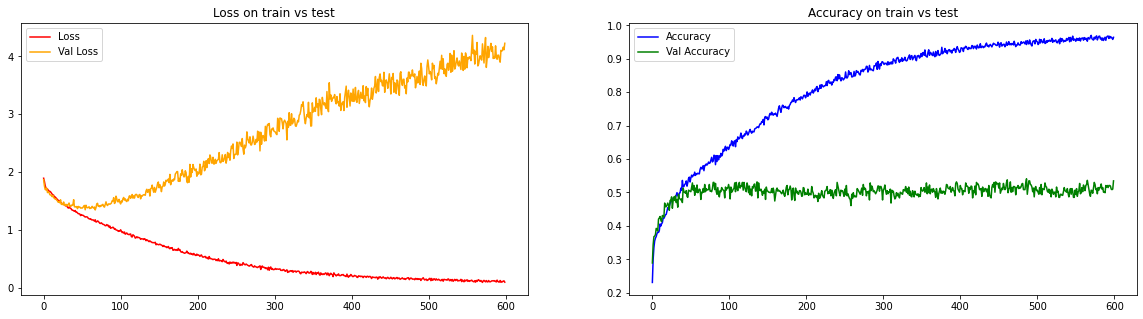

In [37]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')

plt.show()

In [38]:
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

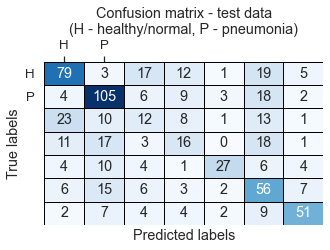

Classification report on test data
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       136
           1       0.63      0.71      0.67       147
           2       0.23      0.18      0.20        68
           3       0.30      0.24      0.27        66
           4       0.75      0.48      0.59        56
           5       0.40      0.59      0.48        95
           6       0.72      0.65      0.68        79

    accuracy                           0.53       647
   macro avg       0.52      0.49      0.50       647
weighted avg       0.54      0.53      0.53       647



In [39]:
# calculate confusion matrix & classification report
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

In [40]:
y_val_hat = model.predict(X_val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)